In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cell_samples.csv')

In [3]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
data.shape

(699, 11)

In [6]:
data.size

7689

In [7]:
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [8]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [9]:
data.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

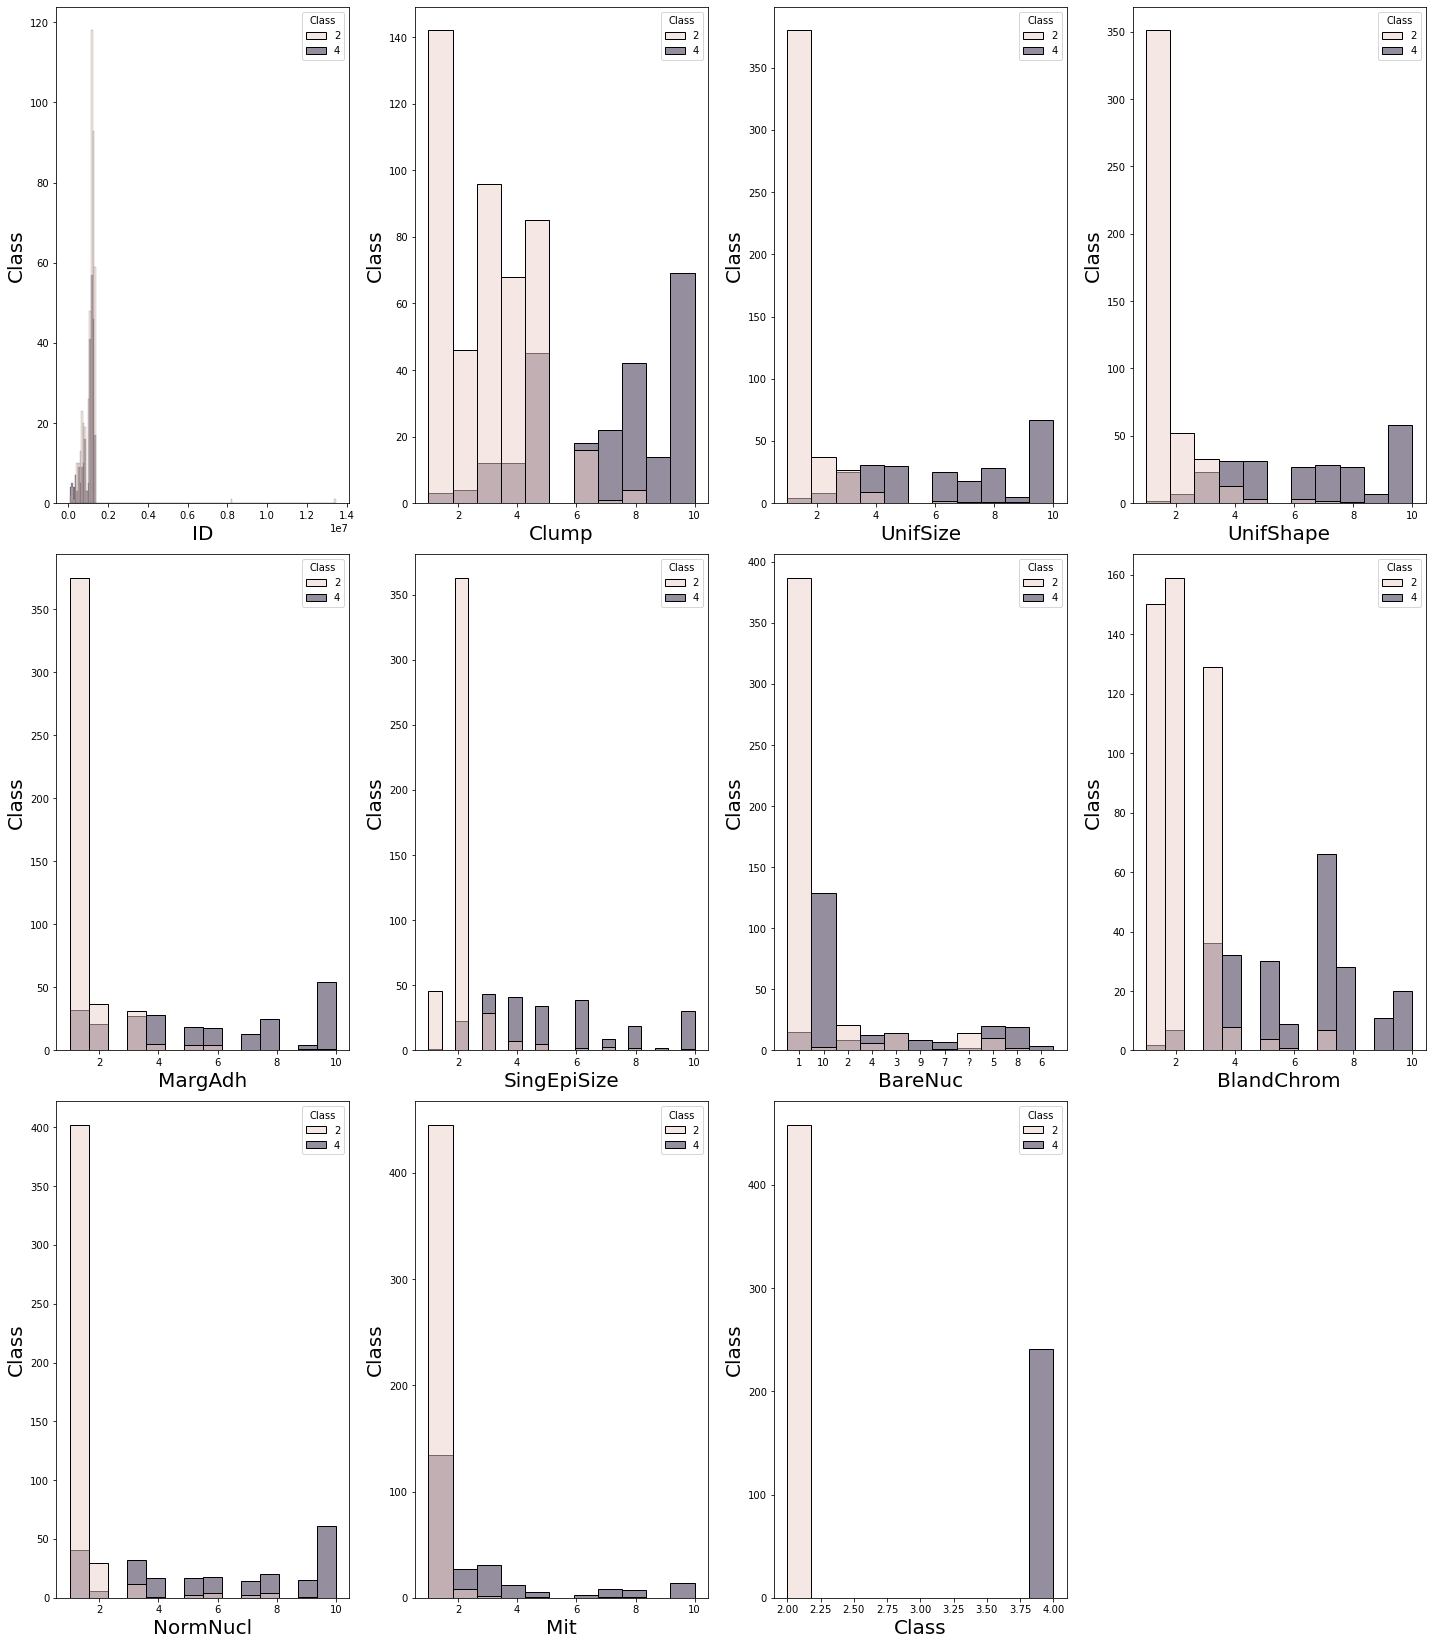

In [10]:
plt.figure(figsize=(20,30), facecolor = 'white')
plotnumber = 1

for columns in data:
    if plotnumber<=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x = data[columns].dropna(axis = 0),hue = data.Class)
        plt.xlabel(columns,fontsize = 20)
        plt.ylabel('Class',fontsize = 20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

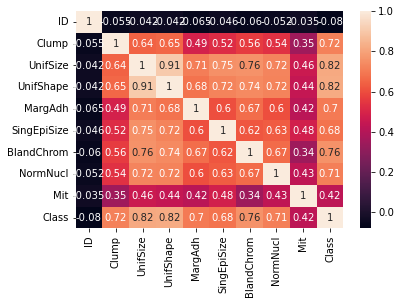

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
data.BareNuc.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [15]:
#Convert object into int 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['BareNuc'] = label_encoder.fit_transform(data['BareNuc'])

In [16]:
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,0,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,0,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [17]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [18]:
#Model Creation
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [19]:
x

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,0,3,1,1
1,5,4,4,5,7,1,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,0,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [20]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45)

In [22]:
x_train

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
637,4,2,4,3,2,2,2,1,1
458,5,1,2,1,2,0,1,1,1
608,5,10,10,10,10,1,10,1,1
627,2,1,1,1,2,5,1,1,1
442,1,1,1,3,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...
163,1,1,1,2,1,3,1,1,7
607,1,1,1,1,2,0,1,1,1
544,2,1,3,2,2,0,2,1,1
643,1,1,1,1,2,0,1,1,1


In [23]:
y_train

637    2
458    2
608    4
627    2
442    2
      ..
163    2
607    2
544    2
643    2
414    4
Name: Class, Length: 524, dtype: int64

In [24]:
from sklearn.svm import SVC
svclassifier = SVC()## base model with default parameters
svclassifier.fit(x_train,y_train)

SVC()

In [25]:
y_pred = svclassifier.predict(x_test)
y_pred

array([2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2],
      dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.9828571428571429

In [27]:
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       117
           4       0.98      0.97      0.97        58

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



In [28]:
cm1=pd.crosstab(y_test,y_pred)
cm1

col_0,2,4
Class,,
2,116,1
4,2,56


In [36]:
from sklearn import svm 
Classifier=svm.SVC(kernel = 'linear',  gamma = 'auto' , C =2)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4,
       2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2],
      dtype=int64)

In [38]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       117
           4       1.00      0.93      0.96        58

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

